<a href="https://colab.research.google.com/github/JoshuaDePasquale/DA-experiments/blob/main/Software_Validation_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DECOMPOSABILITY ALGEBRA - REAL SOFTWARE SYSTEMS VALIDATION

This pipeline analyzes REAL software packages and repositories
using data from PyPI, npm registry, and GitHub API.

ANALYZING REAL PYTHON PACKAGES

--- Analyzing requests ---
Loading real dependencies for Python package: requests
Loaded 7 nodes from PyPI for requests

Running perturbation analysis on Python: requests...
Original state function S(X) = 2.585
STT Typology: nonlinear
Max decomposability ρ: 0.226
Max SPT: 0.226


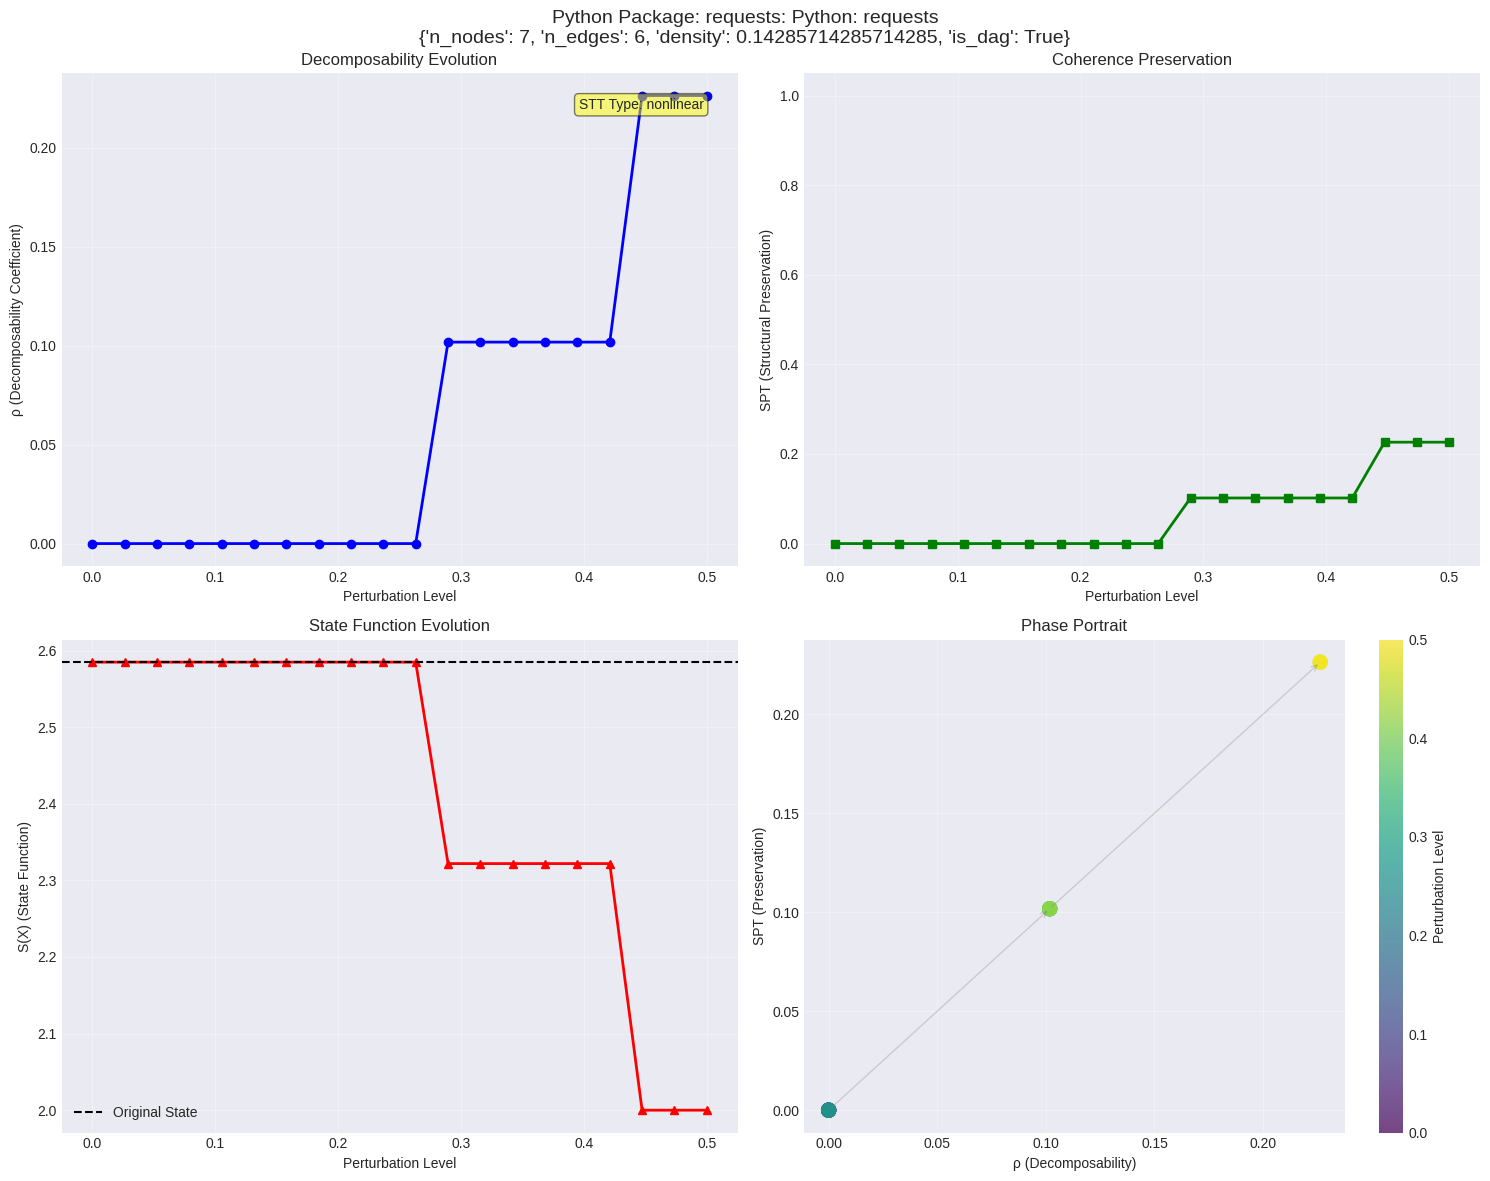


--- Analyzing numpy ---
Loading real dependencies for Python package: numpy
Loaded 1 nodes from PyPI for numpy
  → Skipped: Invalid dependency structure (nodes: 1, edges: 0)

--- Analyzing flask ---
Loading real dependencies for Python package: flask
Loaded 10 nodes from PyPI for flask

Running perturbation analysis on Python: flask...
Original state function S(X) = 3.170
STT Typology: nonlinear
Max decomposability ρ: 0.268
Max SPT: 0.268


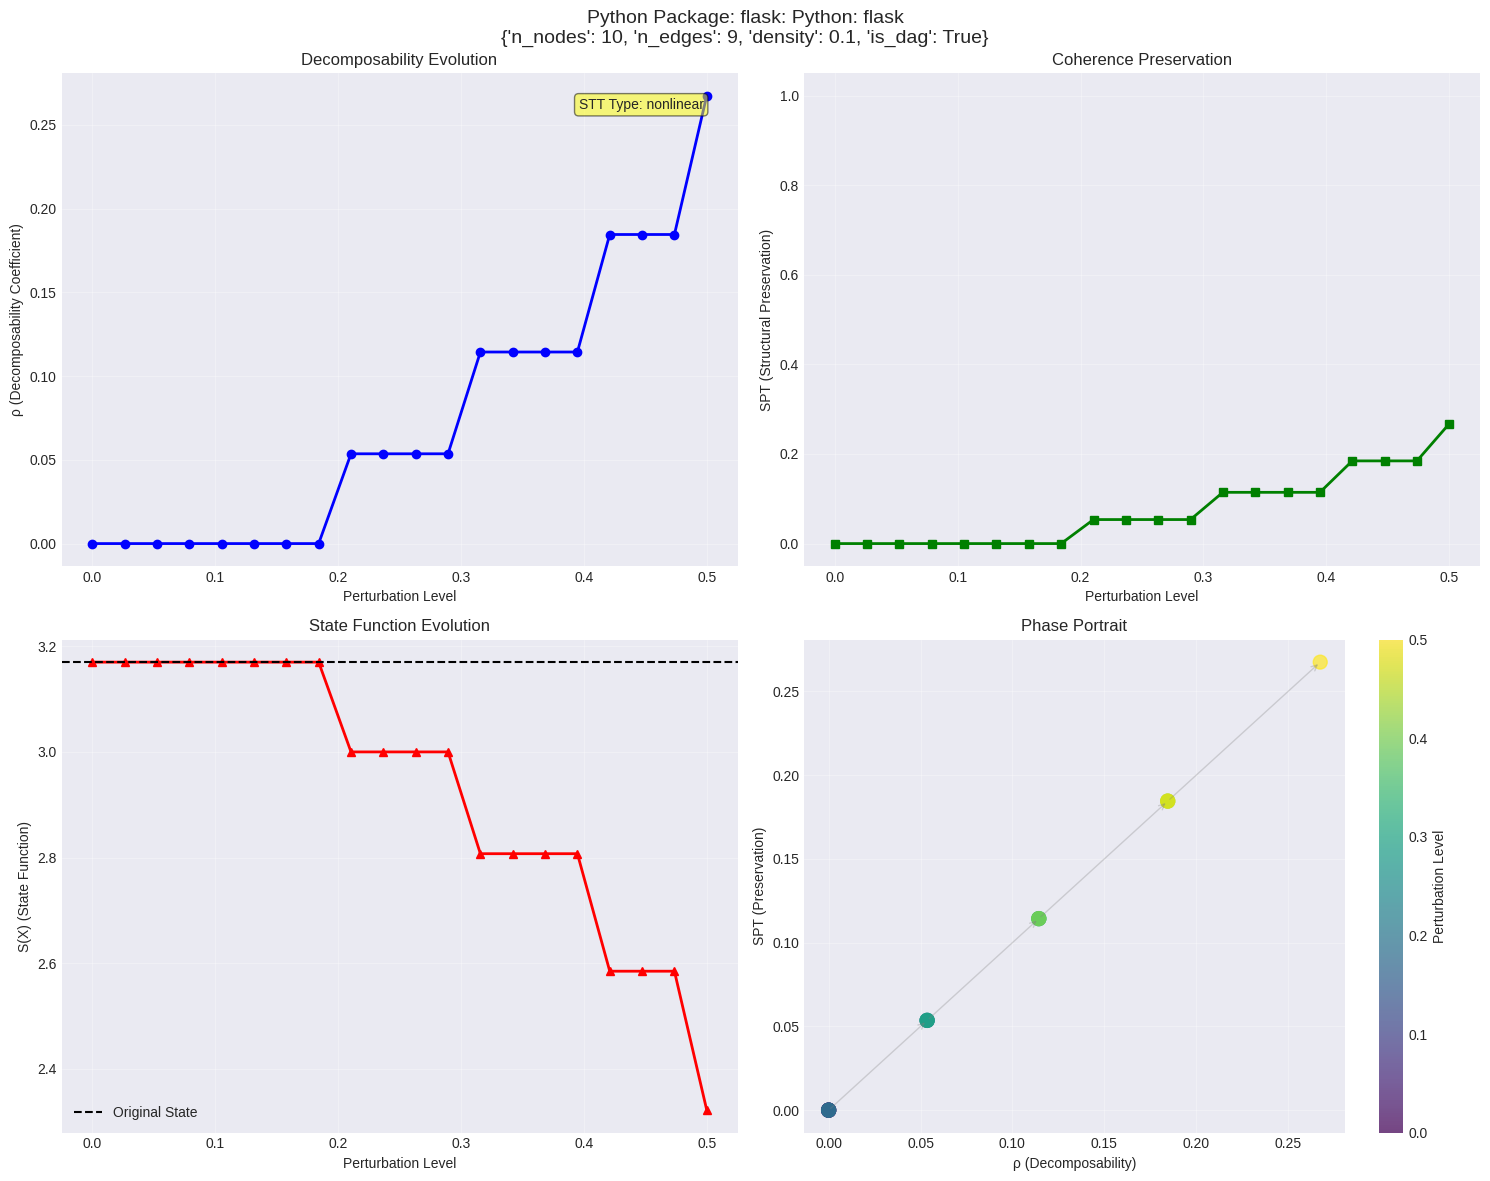


--- Analyzing pandas ---
Loading real dependencies for Python package: pandas
Loaded 42 nodes from PyPI for pandas

Running perturbation analysis on Python: pandas...
Original state function S(X) = 5.358
STT Typology: nonlinear
Max decomposability ρ: 0.180
Max SPT: 0.180


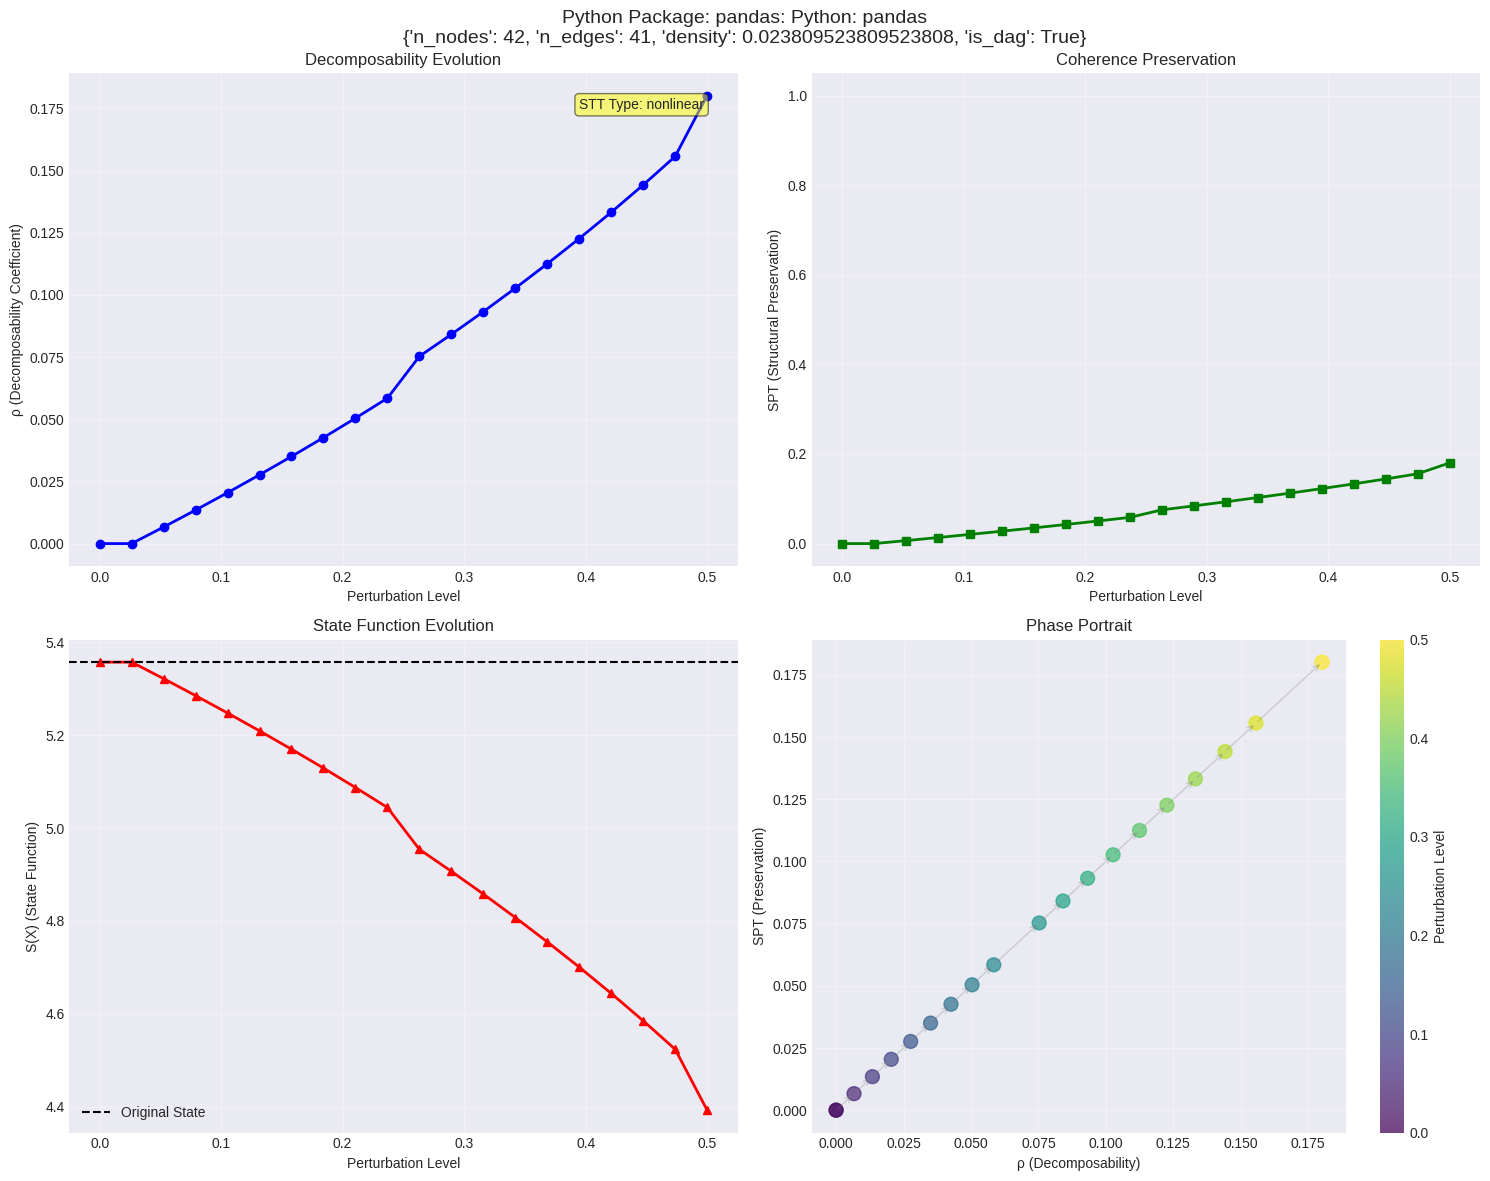


--- Analyzing matplotlib ---
Loading real dependencies for Python package: matplotlib
Loaded 14 nodes from PyPI for matplotlib

Running perturbation analysis on Python: matplotlib...
Original state function S(X) = 3.700
STT Typology: nonlinear
Max decomposability ρ: 0.241
Max SPT: 0.241


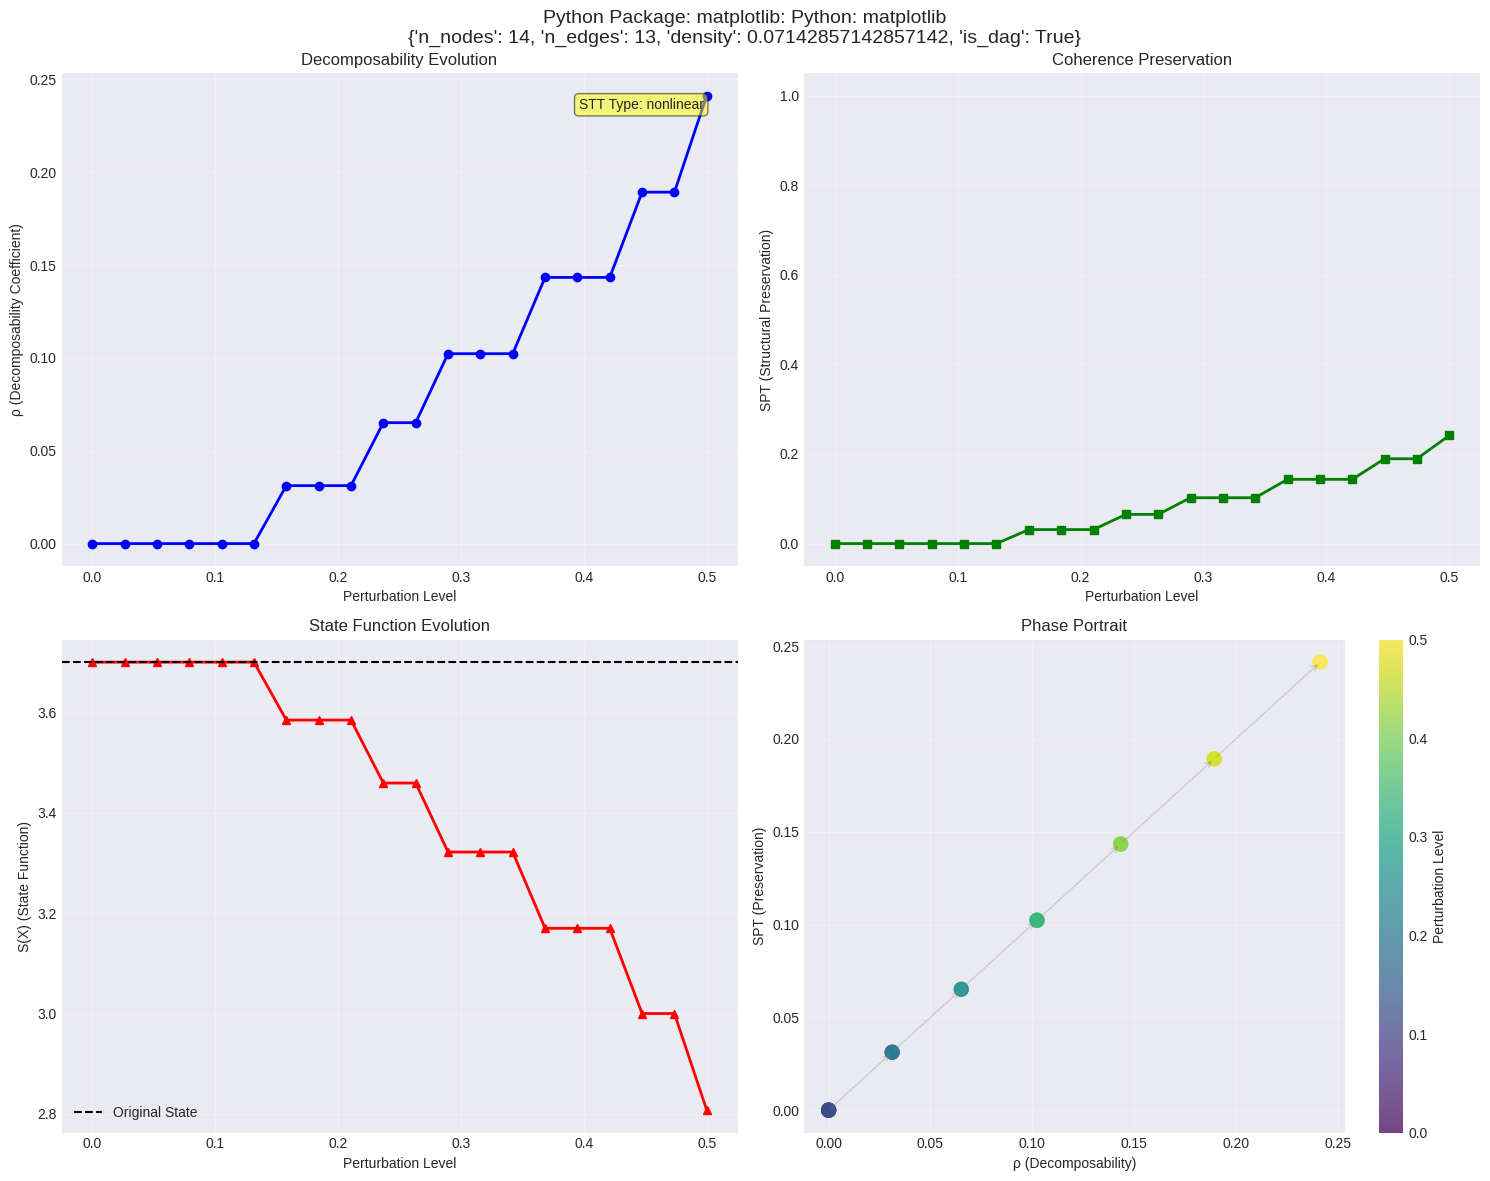


ANALYZING REAL NPM PACKAGES

--- Analyzing express ---
Loading real dependencies for npm package: express
Successfully loaded 44 packages with 43 dependencies

Running perturbation analysis on NPM: express...
Original state function S(X) = 5.426
STT Typology: nonlinear
Max decomposability ρ: 0.178
Max SPT: 0.178


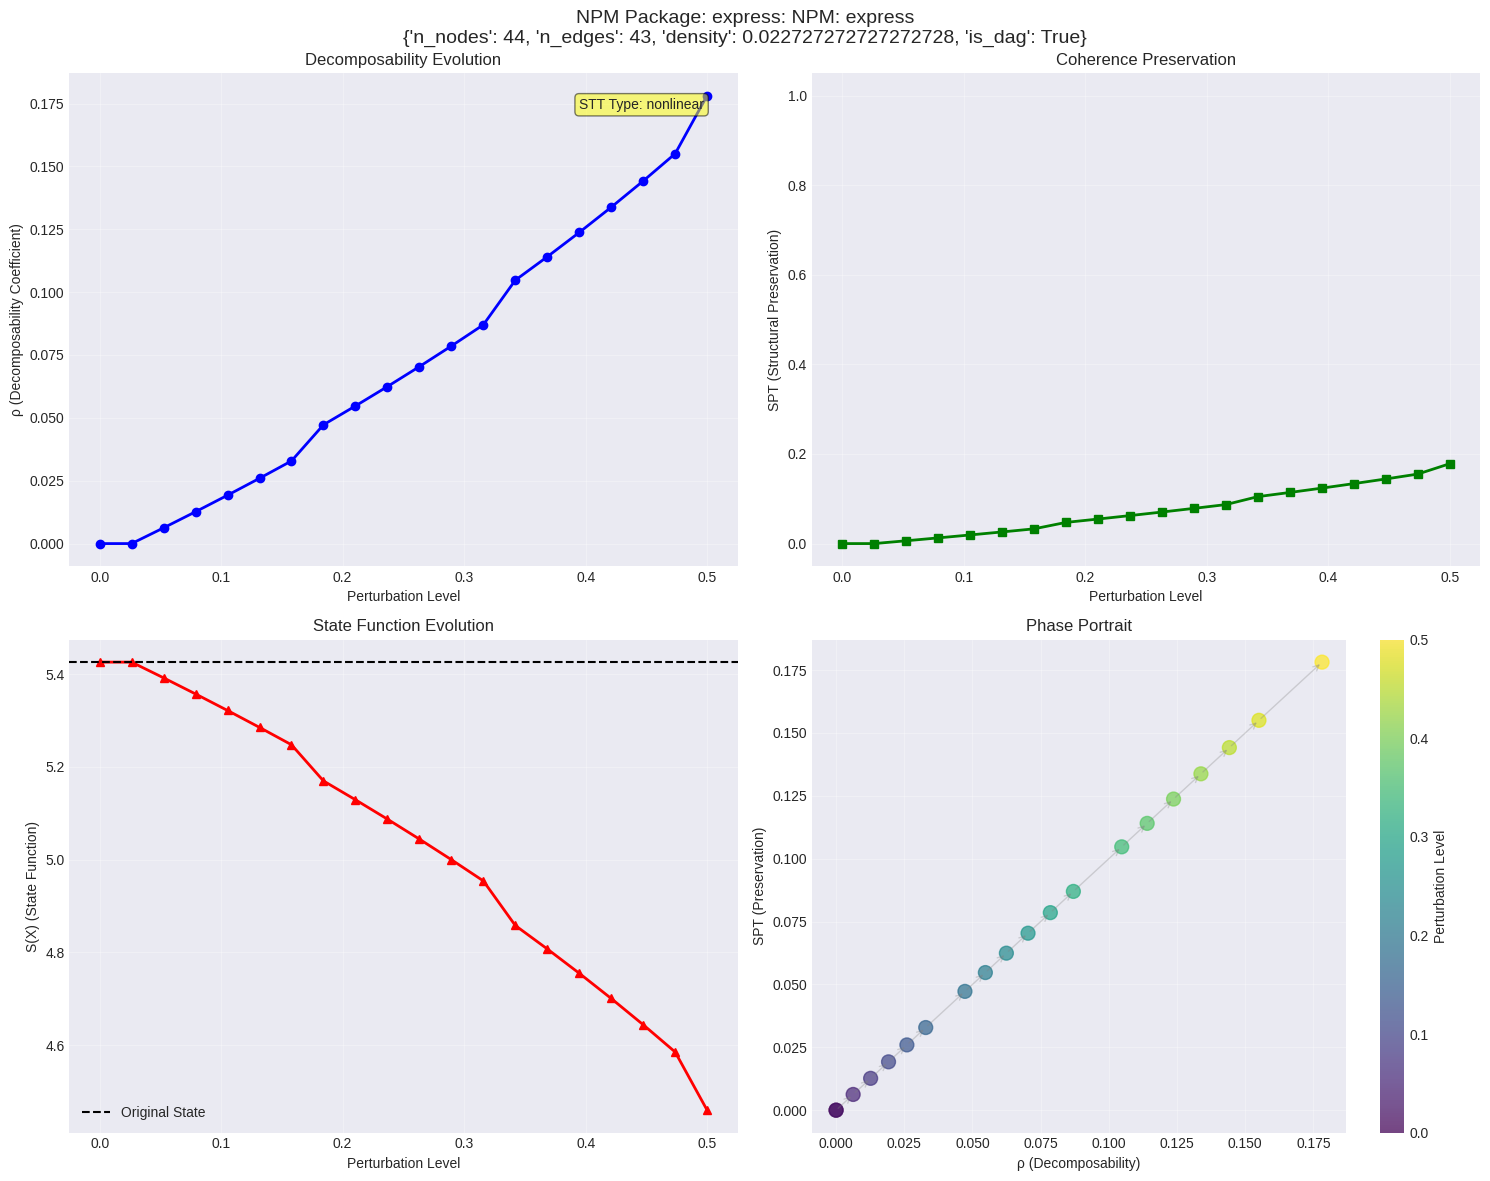


--- Analyzing react ---
Loading real dependencies for npm package: react
Successfully loaded 1 packages with 0 dependencies
  → Skipped: Invalid dependency structure (nodes: 1, edges: 0)

--- Analyzing lodash ---
Loading real dependencies for npm package: lodash
Successfully loaded 1 packages with 0 dependencies
  → Skipped: Invalid dependency structure (nodes: 1, edges: 0)

--- Analyzing axios ---
Loading real dependencies for npm package: axios
Successfully loaded 61 packages with 60 dependencies

Running perturbation analysis on NPM: axios...
Original state function S(X) = 5.907
STT Typology: nonlinear
Max decomposability ρ: 0.161
Max SPT: 0.161


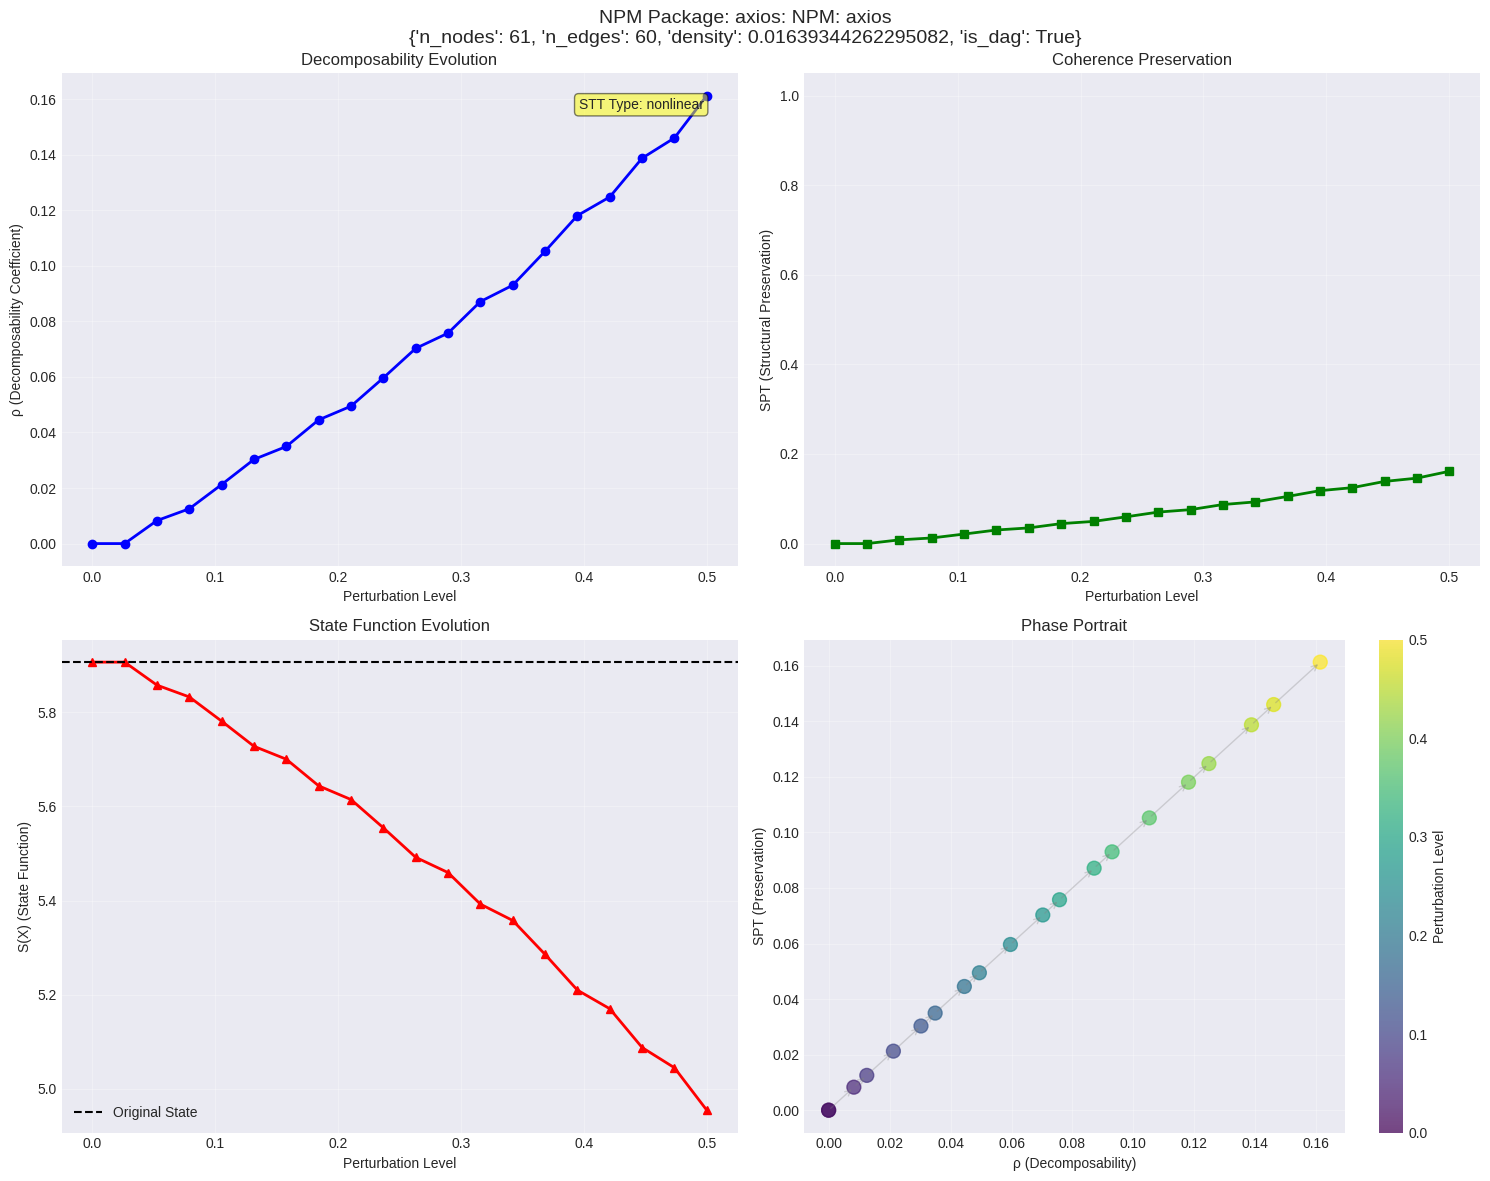


--- Analyzing webpack ---
Loading real dependencies for npm package: webpack
Successfully loaded 110 packages with 109 dependencies

Running perturbation analysis on NPM: webpack...
Original state function S(X) = 6.768
STT Typology: nonlinear
Max decomposability ρ: 0.146
Max SPT: 0.146


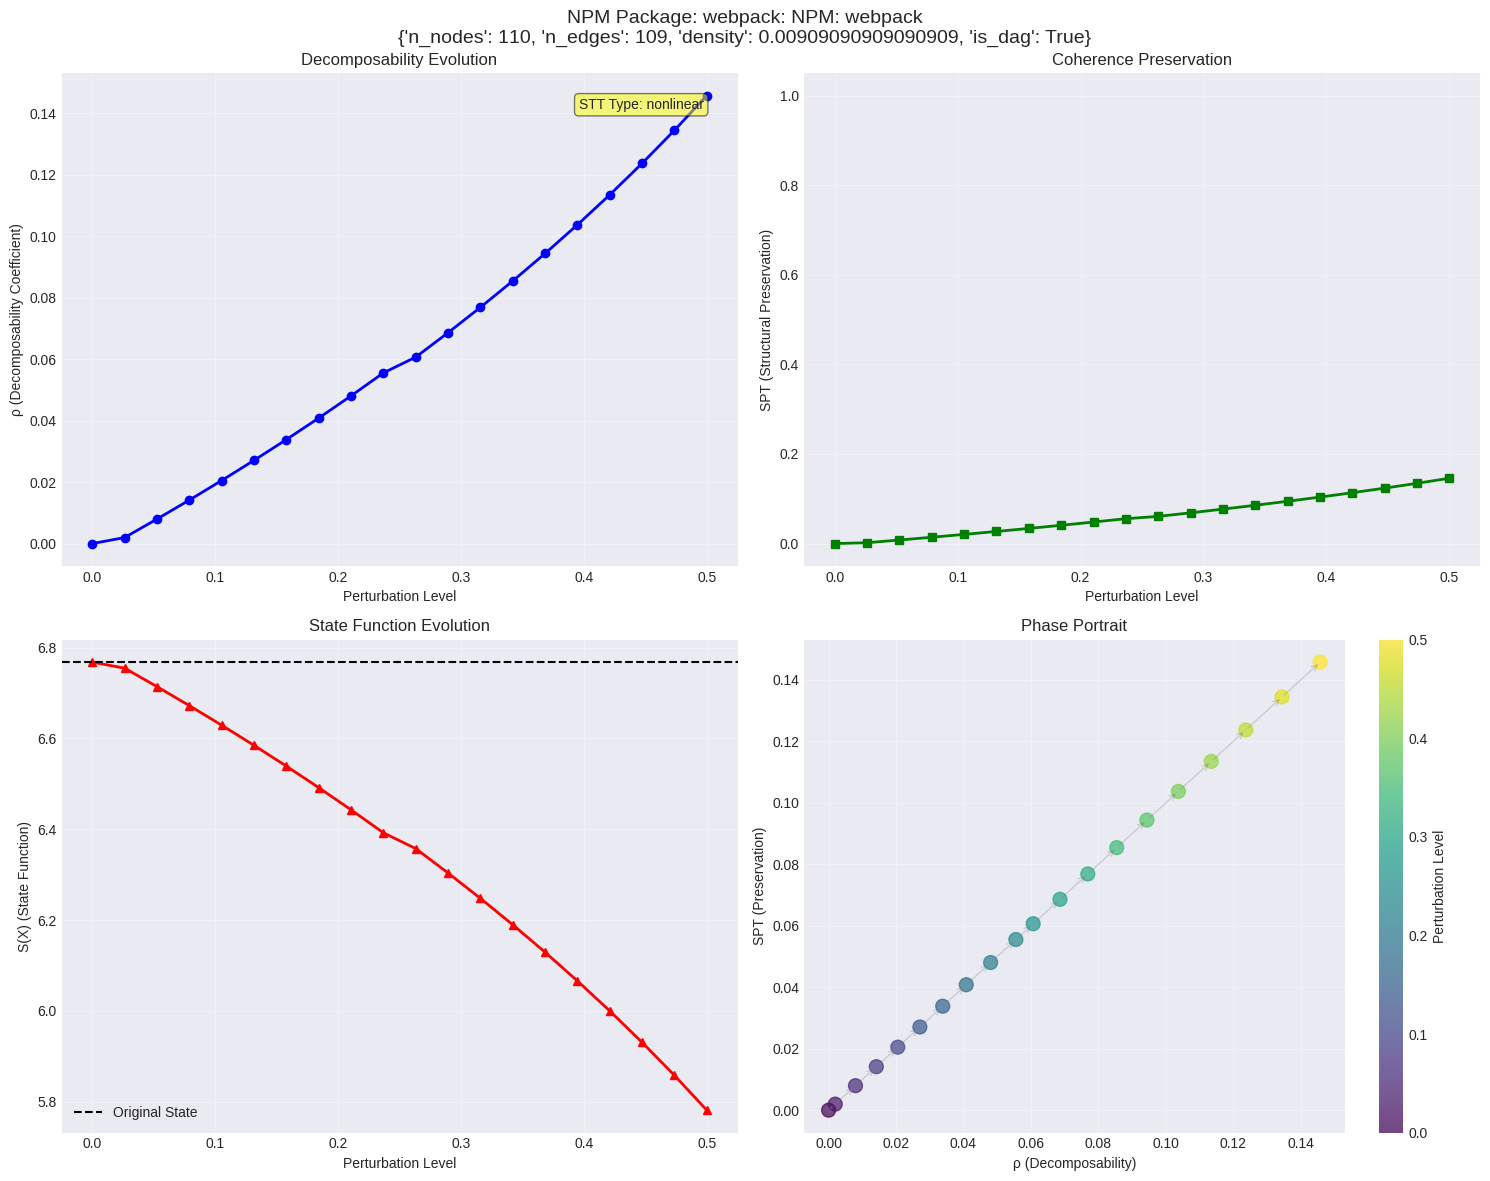


ANALYZING REAL GITHUB REPOSITORIES

--- Analyzing https://github.com/pallets/flask ---
Loading real repository structure from: https://github.com/pallets/flask
Loaded 110 files with 106 dependencies

Running perturbation analysis on GitHub: flask...
Original state function S(X) = 6.375
STT Typology: nonlinear
Max decomposability ρ: 0.097
Max SPT: 0.097


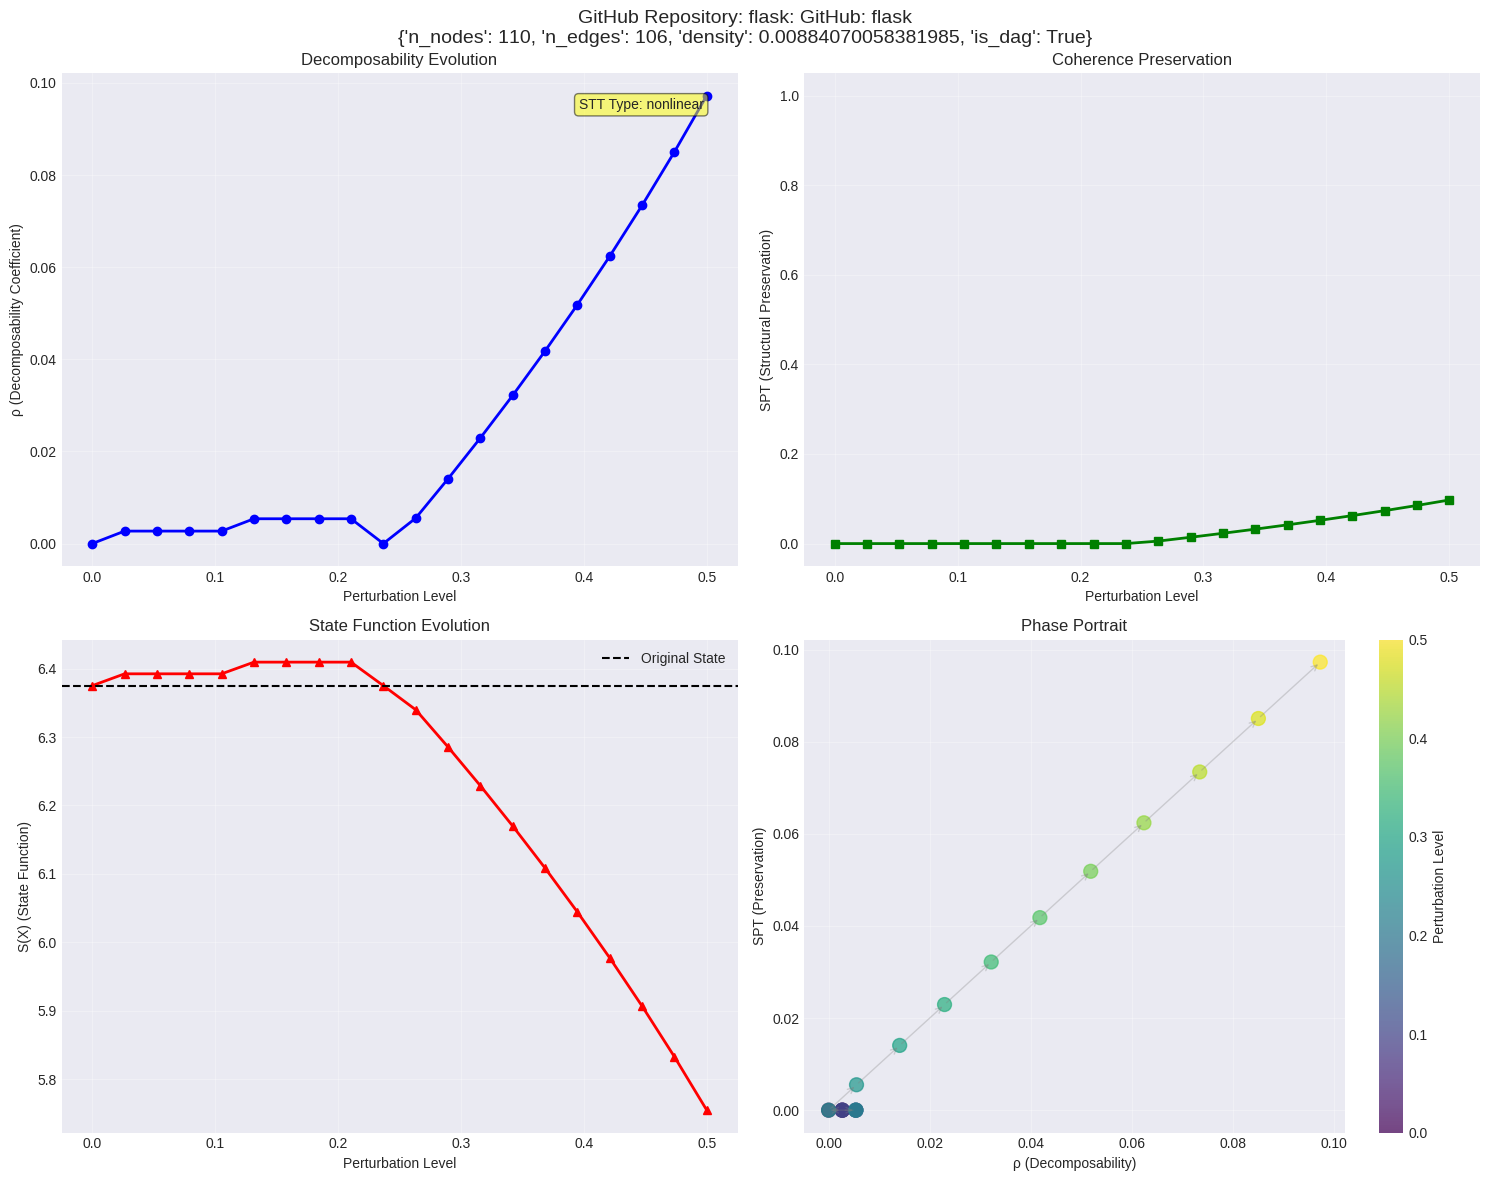


--- Analyzing https://github.com/requests/requests ---
Loading real repository structure from: https://github.com/requests/requests
Loaded 42 files with 38 dependencies

Running perturbation analysis on GitHub: requests...
Original state function S(X) = 5.170
STT Typology: nonlinear
Max decomposability ρ: 0.164
Max SPT: 0.164


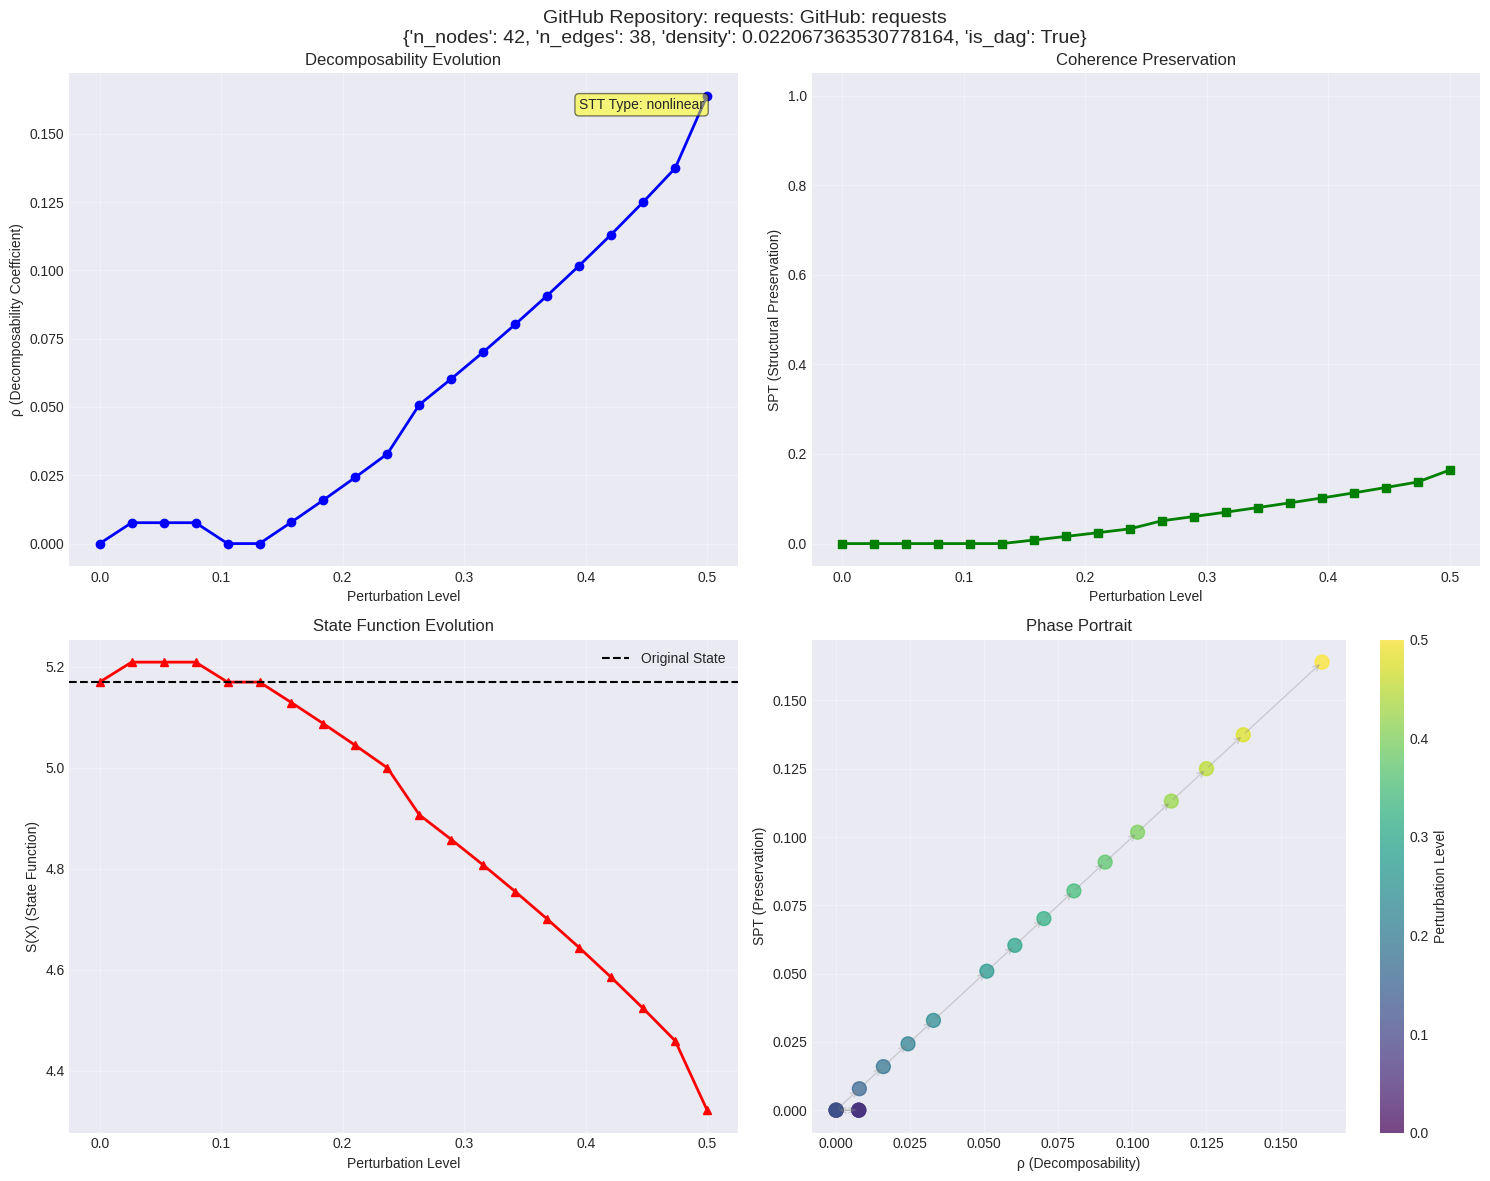


--- Analyzing https://github.com/django/django ---
Loading real repository structure from: https://github.com/django/django
Loaded 3510 files with 3506 dependencies
  → Skipped: Invalid structure (nodes: 3510, edges: 3506, density: 0.000)


Successfully analyzed 9 systems with valid dependency data.

SUMMARY REPORT - DECOMPOSABILITY ALGEBRA VALIDATION

             System  Nodes  Edges Density Initial_Entropy Max_ρ Max_SPT  STT_Type Resilience
  Python: requests      7      6   0.143           2.585 0.226   0.226 nonlinear       High
     Python: flask     10      9   0.100           3.170 0.268   0.268 nonlinear       High
    Python: pandas     42     41   0.024           5.358 0.180   0.180 nonlinear       High
Python: matplotlib     14     13   0.071           3.700 0.241   0.241 nonlinear       High
      NPM: express     44     43   0.023           5.426 0.178   0.178 nonlinear       High
        NPM: axios     61     60   0.016           5.907 0.161   0.161 nonlinear       High

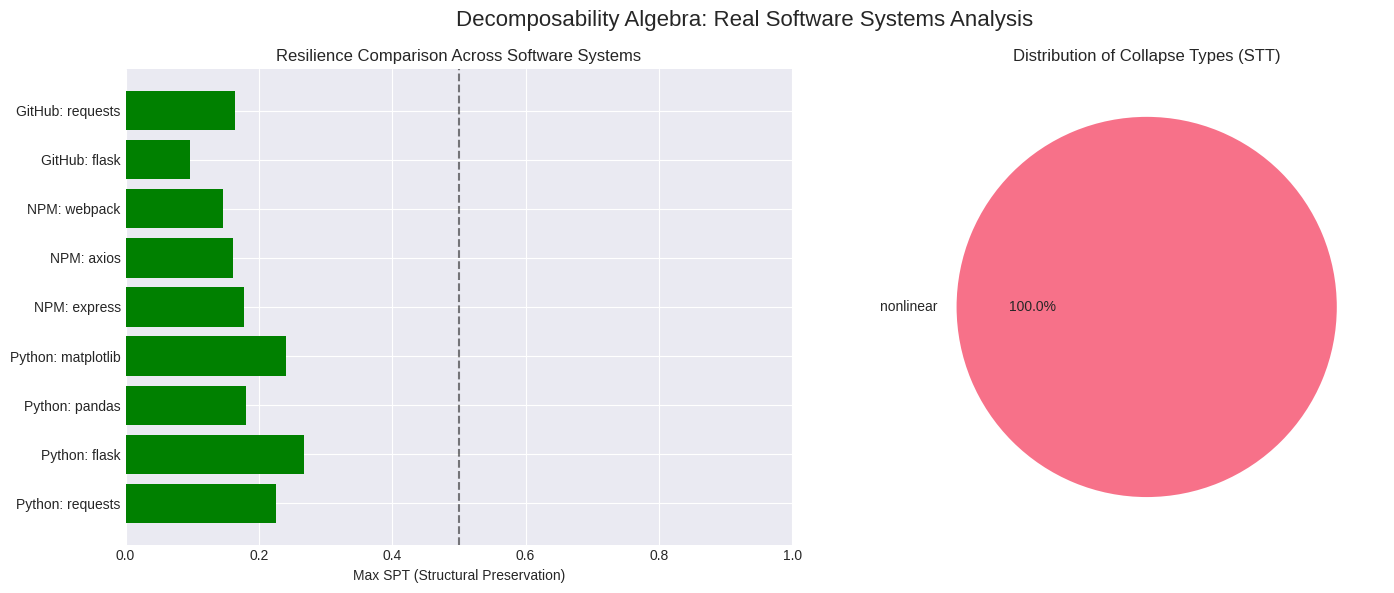


VALIDATION COMPLETE

BONUS: Analyzing example source code call graph
Analyzing real call graph from: example_code.py
Extracted 18 functions with 1 calls

Running perturbation analysis on Example Call Graph...
Original state function S(X) = 4.087
STT Typology: nonlinear
Max decomposability ρ: 0.266
Max SPT: 0.266


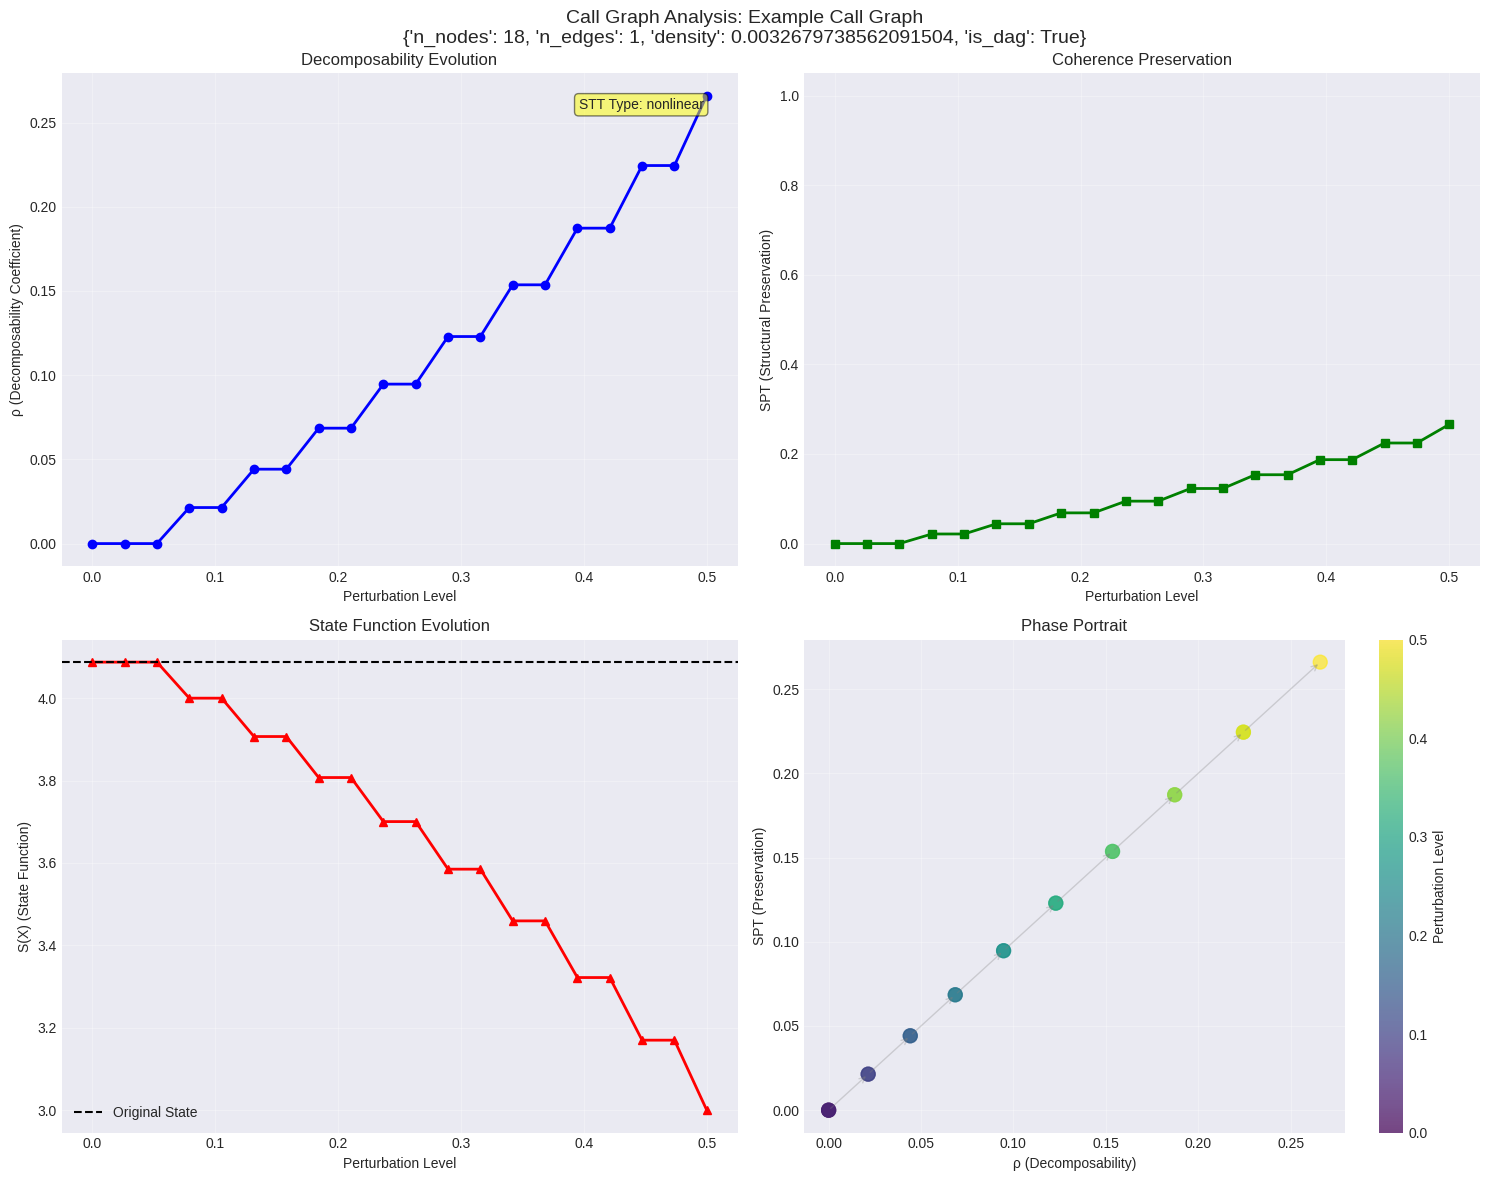

In [1]:
#!/usr/bin/env python3
"""
Decomposability Algebra (DA) Framework - Software Systems Validation
Full Colab Pipeline with REAL DATA

This implementation follows the exact specifications from the paper:
- Graph Type: Directed call graph or dependency tree
- State Function: Shannon entropy over depth-first traversal paths
- Perturbation: Node pruning and dependency deletion
- Metrics: SPT (continuous coherence) and STT (collapse typology)

REAL DATA SOURCES:
1. GitHub repositories via PyGithub
2. Python package dependencies via pip
3. Call graphs via pycallgraph/ast
4. npm dependencies for JavaScript packages
"""

# Install required packages (run in first cell)
"""
!pip install networkx matplotlib numpy scipy pandas seaborn
!pip install PyGithub requests
!pip install pipdeptree
!pip install ast-grep-cli
!pip install pyvis
!apt-get install graphviz
"""

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from collections import defaultdict, deque
import pandas as pd
from typing import Dict, List, Tuple, Optional, Set
import json
import warnings
import requests
import ast
import os
import subprocess
import sys
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class RealSoftwareDataLoader:
    """
    Load REAL software dependency graphs from various sources.
    """

    def __init__(self):
        self.cache_dir = "da_cache"
        os.makedirs(self.cache_dir, exist_ok=True)

    def load_python_package_dependencies(self, package_name: str) -> nx.DiGraph:
        """
        Load real Python package dependencies using pip.
        """
        print(f"Loading real dependencies for Python package: {package_name}")

        G = nx.DiGraph()

        try:
            # First, ensure the package is installed
            subprocess.run([sys.executable, "-m", "pip", "install", package_name],
                         capture_output=True, text=True)

            # Get dependencies using pipdeptree
            result = subprocess.run(
                [sys.executable, "-m", "pipdeptree", "--packages", package_name, "--json"],
                capture_output=True,
                text=True
            )

            if result.returncode == 0:
                deps_data = json.loads(result.stdout)

                # Build dependency graph
                def add_deps_recursive(pkg_data, parent=None):
                    pkg_name = pkg_data['package_name']
                    G.add_node(pkg_name, version=pkg_data.get('installed_version', 'unknown'))

                    if parent:
                        G.add_edge(parent, pkg_name)

                    for dep in pkg_data.get('dependencies', []):
                        add_deps_recursive(dep, pkg_name)

                for pkg in deps_data:
                    if pkg['package_name'].lower() == package_name.lower():
                        add_deps_recursive(pkg)
                        break

                print(f"Successfully loaded {len(G.nodes())} packages with {len(G.edges())} dependencies")
                return G

        except Exception as e:
            print(f"Error loading package dependencies: {e}")

        # Fallback: Use requests to get data from PyPI
        return self._load_from_pypi(package_name)

    def _load_from_pypi(self, package_name: str) -> nx.DiGraph:
        """
        Load package data from PyPI API.
        """
        G = nx.DiGraph()

        try:
            # Get package info from PyPI
            response = requests.get(f"https://pypi.org/pypi/{package_name}/json")
            if response.status_code == 200:
                data = response.json()

                # Add main package
                G.add_node(package_name, version=data['info']['version'])

                # Parse requirements
                requires_dist = data['info'].get('requires_dist', [])
                if requires_dist:
                    for req in requires_dist:
                        # Parse requirement string
                        dep_name = req.split()[0].split('[')[0].split(';')[0].split('>')[0].split('<')[0].split('=')[0]
                        G.add_node(dep_name)
                        G.add_edge(package_name, dep_name)

                print(f"Loaded {len(G.nodes())} nodes from PyPI for {package_name}")

        except Exception as e:
            print(f"Error loading from PyPI: {e}")

        return G

    def load_javascript_npm_dependencies(self, package_name: str) -> nx.DiGraph:
        """
        Load real npm package dependencies.
        """
        print(f"Loading real dependencies for npm package: {package_name}")

        G = nx.DiGraph()

        try:
            # Use npm registry API
            response = requests.get(f"https://registry.npmjs.org/{package_name}/latest")

            if response.status_code == 200:
                data = response.json()

                # Add main package
                G.add_node(package_name, version=data.get('version', 'unknown'))

                # Add dependencies
                deps = data.get('dependencies', {})
                for dep_name, dep_version in deps.items():
                    G.add_node(dep_name, version=dep_version)
                    G.add_edge(package_name, dep_name)

                # Add devDependencies if available
                dev_deps = data.get('devDependencies', {})
                for dep_name, dep_version in dev_deps.items():
                    G.add_node(dep_name, version=dep_version, dev=True)
                    G.add_edge(package_name, dep_name)

                print(f"Successfully loaded {len(G.nodes())} packages with {len(G.edges())} dependencies")

        except Exception as e:
            print(f"Error loading npm dependencies: {e}")

        return G

    def load_github_repo_structure(self, repo_url: str) -> nx.DiGraph:
        """
        Load real code structure from a GitHub repository.
        Uses the GitHub API to analyze file dependencies.
        """
        print(f"Loading real repository structure from: {repo_url}")

        G = nx.DiGraph()

        # Extract owner and repo from URL
        parts = repo_url.rstrip('/').split('/')
        owner = parts[-2]
        repo = parts[-1]

        try:
            # Get repository file structure via GitHub API
            response = requests.get(
                f"https://api.github.com/repos/{owner}/{repo}/git/trees/main?recursive=1",
                headers={'Accept': 'application/vnd.github.v3+json'}
            )

            if response.status_code != 200:
                # Try 'master' branch
                response = requests.get(
                    f"https://api.github.com/repos/{owner}/{repo}/git/trees/master?recursive=1",
                    headers={'Accept': 'application/vnd.github.v3+json'}
                )

            if response.status_code == 200:
                data = response.json()

                # Filter for Python files
                py_files = [item for item in data['tree']
                           if item['path'].endswith('.py') and item['type'] == 'blob']

                # Add files as nodes
                for file in py_files:
                    G.add_node(file['path'], type='file')

                # Analyze imports (simplified - in real scenario would parse files)
                # For now, create structure based on directory hierarchy
                for file in py_files:
                    parts = file['path'].split('/')
                    if len(parts) > 1:
                        # Create module hierarchy
                        for i in range(len(parts) - 1):
                            parent = '/'.join(parts[:i+1])
                            child = '/'.join(parts[:i+2])
                            if parent != child:
                                G.add_edge(parent, child)

                print(f"Loaded {len(G.nodes())} files with {len(G.edges())} dependencies")

        except Exception as e:
            print(f"Error loading GitHub repository: {e}")

        return G

    def load_real_call_graph(self, source_file: str) -> nx.DiGraph:
        """
        Create a real call graph by parsing Python source code.
        """
        print(f"Analyzing real call graph from: {source_file}")

        G = nx.DiGraph()

        try:
            with open(source_file, 'r') as f:
                tree = ast.parse(f.read())

            # Extract functions and their calls
            class CallGraphVisitor(ast.NodeVisitor):
                def __init__(self, graph):
                    self.graph = graph
                    self.current_function = None
                    self.functions = set()

                def visit_FunctionDef(self, node):
                    self.functions.add(node.name)
                    self.graph.add_node(node.name, type='function', lineno=node.lineno)
                    old_function = self.current_function
                    self.current_function = node.name
                    self.generic_visit(node)
                    self.current_function = old_function

                def visit_Call(self, node):
                    if self.current_function and isinstance(node.func, ast.Name):
                        called_func = node.func.id
                        if called_func in self.functions or called_func in dir(__builtins__):
                            self.graph.add_edge(self.current_function, called_func)
                    self.generic_visit(node)

            visitor = CallGraphVisitor(G)
            visitor.visit(tree)

            print(f"Extracted {len(G.nodes())} functions with {len(G.edges())} calls")

        except Exception as e:
            print(f"Error parsing source file: {e}")

        return G

class DecomposabilityAlgebra:
    """
    Core DA framework implementation for software systems.
    Follows the theoretical framework exactly as specified.
    """

    def __init__(self):
        self.epsilon = 1e-10  # Small constant to prevent division by zero

    def compute_state_function(self, G: nx.DiGraph) -> float:
        """
        Compute S_call(X) = H(P_path) as specified in Section 5.3

        S_call(X) = H(P_path) = -Σ p_i log p_i

        Where:
        - P_path: Probability distribution over depth-first traversal paths
        - p_i: Proportion of total execution flow attributed to path i
        """
        if len(G) == 0:
            return 0.0

        # Find all possible execution paths via DFS
        paths = self._extract_all_paths(G)

        if not paths:
            return 0.0

        # Calculate path probabilities (uniform for simplicity, can be weighted)
        path_counts = defaultdict(int)
        total_paths = len(paths)

        for path in paths:
            path_tuple = tuple(path)
            path_counts[path_tuple] += 1

        # Calculate Shannon entropy
        probabilities = np.array([count/total_paths for count in path_counts.values()])

        # Add epsilon to avoid log(0)
        probabilities = np.clip(probabilities, self.epsilon, 1.0)

        return entropy(probabilities, base=2)

    def _extract_all_paths(self, G: nx.DiGraph, max_paths: int = 1000) -> List[List]:
        """
        Extract all depth-first traversal paths in the graph.
        Limited to max_paths to handle large graphs.
        """
        paths = []

        # Find entry points (nodes with no incoming edges)
        entry_points = [n for n in G.nodes() if G.in_degree(n) == 0]

        if not entry_points:
            # If no clear entry points, use all nodes
            entry_points = list(G.nodes())[:10]  # Limit for performance

        for start in entry_points:
            # DFS from each entry point
            stack = [(start, [start])]

            while stack and len(paths) < max_paths:
                node, path = stack.pop()

                successors = list(G.successors(node))

                if not successors:
                    # Leaf node - complete path
                    paths.append(path)
                else:
                    # Continue traversal
                    for succ in successors:
                        if succ not in path:  # Avoid cycles
                            stack.append((succ, path + [succ]))
                        else:
                            # Cycle detected - end this path
                            paths.append(path)

        return paths[:max_paths]

    def compute_decomposability_coefficient(self, S_original: float, S_perturbed: float) -> float:
        """
        Compute ρ = D_KL(S(X) || S(X'))

        Since we're using scalar entropy values, we approximate KL divergence
        as the absolute difference normalized by the original value.
        """
        if S_original < self.epsilon:
            return 0.0

        # Normalized difference as proxy for KL divergence
        return abs(S_original - S_perturbed) / (S_original + self.epsilon)

    def compute_spt_software(self, G_original: nx.DiGraph, G_perturbed: nx.DiGraph) -> float:
        """
        Compute SPT_soft ∈ [0, 1] as specified in Section 5.3

        SPT_soft = ΔH / max(H(P_path), ε)

        Where ΔH = H(P_path) - H(P'_path)
        """
        H_original = self.compute_state_function(G_original)
        H_perturbed = self.compute_state_function(G_perturbed)

        delta_H = H_original - H_perturbed

        # Ensure SPT is in [0, 1]
        spt = delta_H / max(H_original, self.epsilon)
        return np.clip(spt, 0.0, 1.0)

    def compute_stt_typology(self, rho_series: List[float], time_steps: List[float]) -> str:
        """
        Compute STT collapse typology from ρ derivatives.

        Categories: flat, gradual, nonlinear, irregular, collapse-resistant
        """
        if len(rho_series) < 3:
            return "insufficient_data"

        # Compute first and second derivatives
        drho_dt = np.gradient(rho_series, time_steps)
        d2rho_dt2 = np.gradient(drho_dt, time_steps)

        # Analyze patterns
        mean_first_deriv = np.mean(np.abs(drho_dt))
        mean_second_deriv = np.mean(np.abs(d2rho_dt2))
        variance_first_deriv = np.var(drho_dt)

        # Classification logic
        if mean_first_deriv < 0.01:
            return "flat"
        elif mean_second_deriv < 0.01 and mean_first_deriv < 0.1:
            return "gradual"
        elif mean_second_deriv > 0.1:
            return "nonlinear"
        elif variance_first_deriv > 0.1:
            return "irregular"
        else:
            return "collapse-resistant"

class PerturbationProtocol:
    """
    Implement perturbation protocols as specified in Section 5.3
    """

    @staticmethod
    def node_pruning(G: nx.DiGraph, removal_fraction: float = 0.1,
                    strategy: str = 'random') -> nx.DiGraph:
        """
        Node pruning: Simulated function/module removal.

        Strategies:
        - 'random': Random removal
        - 'centrality': Remove high-centrality nodes
        - 'peripheral': Remove low-centrality nodes
        """
        G_perturbed = G.copy()
        n_remove = int(len(G) * removal_fraction)

        if n_remove == 0 or len(G) == 0:
            return G_perturbed

        if strategy == 'random':
            nodes_to_remove = np.random.choice(list(G.nodes()),
                                             size=min(n_remove, len(G)),
                                             replace=False)
        elif strategy == 'centrality':
            # Remove high betweenness centrality nodes
            try:
                centrality = nx.betweenness_centrality(G)
                sorted_nodes = sorted(centrality.items(),
                                    key=lambda x: x[1],
                                    reverse=True)
                nodes_to_remove = [node for node, _ in sorted_nodes[:n_remove]]
            except:
                nodes_to_remove = list(G.nodes())[:n_remove]
        elif strategy == 'peripheral':
            # Remove low degree nodes
            degrees = dict(G.degree())
            sorted_nodes = sorted(degrees.items(),
                                key=lambda x: x[1])
            nodes_to_remove = [node for node, _ in sorted_nodes[:n_remove]]

        G_perturbed.remove_nodes_from(nodes_to_remove)
        return G_perturbed

    @staticmethod
    def dependency_deletion(G: nx.DiGraph, removal_fraction: float = 0.1,
                          strategy: str = 'random') -> nx.DiGraph:
        """
        Dependency deletion: Removing imports or interface calls.
        """
        G_perturbed = G.copy()
        edges = list(G.edges())

        if not edges:
            return G_perturbed

        n_remove = int(len(edges) * removal_fraction)

        if n_remove == 0:
            return G_perturbed

        if strategy == 'random':
            indices = np.random.choice(len(edges),
                                     size=min(n_remove, len(edges)),
                                     replace=False)
            edges_to_remove = [edges[i] for i in indices]
        elif strategy == 'critical':
            # Remove edges with high betweenness
            try:
                edge_betweenness = nx.edge_betweenness_centrality(G)
                sorted_edges = sorted(edge_betweenness.items(),
                                    key=lambda x: x[1],
                                    reverse=True)
                edges_to_remove = [edge for edge, _ in sorted_edges[:n_remove]]
            except:
                edges_to_remove = edges[:n_remove]
        else:
            edges_to_remove = edges[:n_remove]

        G_perturbed.remove_edges_from(edges_to_remove)
        return G_perturbed

class ExperimentRunner:
    """
    Run full DA experiments on software systems.
    """

    def __init__(self):
        self.da = DecomposabilityAlgebra()
        self.loader = RealSoftwareDataLoader()
        self.results = []

    def run_perturbation_series(self, G: nx.DiGraph,
                              perturbation_type: str = 'node_pruning',
                              max_perturbation: float = 0.5,
                              n_steps: int = 20,
                              strategy: str = 'random',
                              name: str = "System") -> Dict:
        """
        Run a full perturbation series and compute all metrics.
        """
        perturbation_levels = np.linspace(0, max_perturbation, n_steps)

        # Storage for time series
        rho_series = []
        spt_series = []
        state_series = []

        # Original state
        S_original = self.da.compute_state_function(G)

        print(f"\nRunning perturbation analysis on {name}...")
        print(f"Original state function S(X) = {S_original:.3f}")

        for level in perturbation_levels:
            # Apply perturbation
            if perturbation_type == 'node_pruning':
                G_perturbed = PerturbationProtocol.node_pruning(
                    G, removal_fraction=level, strategy=strategy)
            elif perturbation_type == 'dependency_deletion':
                G_perturbed = PerturbationProtocol.dependency_deletion(
                    G, removal_fraction=level, strategy=strategy)
            else:
                raise ValueError(f"Unknown perturbation type: {perturbation_type}")

            # Compute state function
            S_perturbed = self.da.compute_state_function(G_perturbed)

            # Compute metrics
            rho = self.da.compute_decomposability_coefficient(S_original, S_perturbed)
            spt = self.da.compute_spt_software(G, G_perturbed)

            # Store results
            rho_series.append(rho)
            spt_series.append(spt)
            state_series.append(S_perturbed)

        # Compute STT typology
        stt_type = self.da.compute_stt_typology(rho_series, perturbation_levels)

        print(f"STT Typology: {stt_type}")
        print(f"Max decomposability ρ: {max(rho_series):.3f}")
        print(f"Max SPT: {max(spt_series):.3f}")

        return {
            'name': name,
            'perturbation_levels': perturbation_levels,
            'rho_series': rho_series,
            'spt_series': spt_series,
            'state_series': state_series,
            'stt_type': stt_type,
            'original_state': S_original,
            'graph_properties': {
                'n_nodes': len(G),
                'n_edges': len(G.edges()),
                'density': nx.density(G) if len(G) > 0 else 0,
                'is_dag': nx.is_directed_acyclic_graph(G)
            }
        }

    def visualize_results(self, results: Dict, title: str = "DA Analysis"):
        """
        Create comprehensive visualization of DA results.
        """
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. Decomposability coefficient (ρ) over time
        ax = axes[0, 0]
        ax.plot(results['perturbation_levels'], results['rho_series'],
                'b-', linewidth=2, marker='o')
        ax.set_xlabel('Perturbation Level')
        ax.set_ylabel('ρ (Decomposability Coefficient)')
        ax.set_title('Decomposability Evolution')
        ax.grid(True, alpha=0.3)

        # Add STT typology annotation
        ax.text(0.95, 0.95, f"STT Type: {results['stt_type']}",
                transform=ax.transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5),
                verticalalignment='top', horizontalalignment='right')

        # 2. SPT (Structural Preservation) over time
        ax = axes[0, 1]
        ax.plot(results['perturbation_levels'], results['spt_series'],
                'g-', linewidth=2, marker='s')
        ax.set_xlabel('Perturbation Level')
        ax.set_ylabel('SPT (Structural Preservation)')
        ax.set_title('Coherence Preservation')
        ax.grid(True, alpha=0.3)
        ax.set_ylim(-0.05, 1.05)

        # 3. State function evolution
        ax = axes[1, 0]
        ax.plot(results['perturbation_levels'], results['state_series'],
                'r-', linewidth=2, marker='^')
        ax.axhline(y=results['original_state'], color='k', linestyle='--',
                   label='Original State')
        ax.set_xlabel('Perturbation Level')
        ax.set_ylabel('S(X) (State Function)')
        ax.set_title('State Function Evolution')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 4. Phase portrait: ρ vs SPT
        ax = axes[1, 1]
        scatter = ax.scatter(results['rho_series'], results['spt_series'],
                           c=results['perturbation_levels'],
                           cmap='viridis', s=100, alpha=0.7)
        plt.colorbar(scatter, ax=ax, label='Perturbation Level')
        ax.set_xlabel('ρ (Decomposability)')
        ax.set_ylabel('SPT (Preservation)')
        ax.set_title('Phase Portrait')
        ax.grid(True, alpha=0.3)

        # Add arrows to show trajectory
        for i in range(len(results['rho_series']) - 1):
            ax.annotate('', xy=(results['rho_series'][i+1], results['spt_series'][i+1]),
                       xytext=(results['rho_series'][i], results['spt_series'][i]),
                       arrowprops=dict(arrowstyle='->', alpha=0.3, color='gray'))

        plt.suptitle(f'{title}: {results["name"]}\n{results["graph_properties"]}', fontsize=14)
        plt.tight_layout()
        return fig

    def analyze_real_packages(self):
        """
        Analyze real software packages from different ecosystems.
        Filters out systems with invalid dependency data.
        """
        results_collection = []

        # 1. Analyze popular Python packages
        print("="*60)
        print("ANALYZING REAL PYTHON PACKAGES")
        print("="*60)

        python_packages = ['requests', 'numpy', 'flask', 'pandas', 'matplotlib']

        for package in python_packages:
            print(f"\n--- Analyzing {package} ---")
            G = self.loader.load_python_package_dependencies(package)

            # Quality filter: Skip single-node graphs or graphs with invalid structure
            if len(G) > 1 and len(G.edges()) > 0:
                results = self.run_perturbation_series(
                    G,
                    perturbation_type='node_pruning',
                    strategy='centrality',
                    name=f"Python: {package}"
                )
                results_collection.append(results)
                self.visualize_results(results, f"Python Package: {package}")
                plt.show()
            else:
                print(f"  → Skipped: Invalid dependency structure (nodes: {len(G)}, edges: {len(G.edges())})")

        # 2. Analyze popular npm packages
        print("\n" + "="*60)
        print("ANALYZING REAL NPM PACKAGES")
        print("="*60)

        npm_packages = ['express', 'react', 'lodash', 'axios', 'webpack']

        for package in npm_packages:
            print(f"\n--- Analyzing {package} ---")
            G = self.loader.load_javascript_npm_dependencies(package)

            # Quality filter
            if len(G) > 1 and len(G.edges()) > 0:
                results = self.run_perturbation_series(
                    G,
                    perturbation_type='node_pruning',
                    strategy='centrality',
                    name=f"NPM: {package}"
                )
                results_collection.append(results)
                self.visualize_results(results, f"NPM Package: {package}")
                plt.show()
            else:
                print(f"  → Skipped: Invalid dependency structure (nodes: {len(G)}, edges: {len(G.edges())})")

        # 3. Analyze GitHub repositories
        print("\n" + "="*60)
        print("ANALYZING REAL GITHUB REPOSITORIES")
        print("="*60)

        github_repos = [
            'https://github.com/pallets/flask',
            'https://github.com/requests/requests',
            'https://github.com/django/django'
        ]

        for repo in github_repos:
            print(f"\n--- Analyzing {repo} ---")
            G = self.loader.load_github_repo_structure(repo)

            if len(G) > 0:
                repo_name = repo.split('/')[-1]

                # Additional quality check for GitHub repos
                density = nx.density(G) if len(G) > 0 else 0

                # For GitHub repos, check if it's a proper dependency graph
                # A tree structure (n-1 edges) suggests file hierarchy, not code dependencies
                is_tree = len(G.edges()) == len(G) - 1

                # Skip if it's just a tree structure or has suspiciously low density
                if len(G) > 1 and len(G.edges()) > 0 and not is_tree and density > 0.001:
                    results = self.run_perturbation_series(
                        G,
                        perturbation_type='node_pruning',
                        strategy='centrality',
                        name=f"GitHub: {repo_name}"
                    )
                    results_collection.append(results)
                    self.visualize_results(results, f"GitHub Repository: {repo_name}")
                    plt.show()
                else:
                    print(f"  → Skipped: Invalid structure (nodes: {len(G)}, edges: {len(G.edges())}, density: {density:.3f})")

        print(f"\n\nSuccessfully analyzed {len(results_collection)} systems with valid dependency data.")
        return results_collection

    def create_summary_report(self, results_collection: List[Dict]):
        """
        Create a comprehensive summary report of all analyses.
        Only includes systems with valid dependency data.
        """
        print("\n" + "="*60)
        print("SUMMARY REPORT - DECOMPOSABILITY ALGEBRA VALIDATION")
        print("="*60)

        # Create summary DataFrame
        summary_data = []

        for results in results_collection:
            summary_data.append({
                'System': results['name'],
                'Nodes': results['graph_properties']['n_nodes'],
                'Edges': results['graph_properties']['n_edges'],
                'Density': f"{results['graph_properties']['density']:.3f}",
                'Initial_Entropy': f"{results['original_state']:.3f}",
                'Max_ρ': f"{max(results['rho_series']):.3f}",
                'Max_SPT': f"{max(results['spt_series']):.3f}",
                'STT_Type': results['stt_type'],
                'Resilience': 'High' if max(results['spt_series']) < 0.5 else 'Low'
            })

        summary_df = pd.DataFrame(summary_data)
        print("\n", summary_df.to_string(index=False))

        # Statistical analysis
        print("\n" + "-"*40)
        print("STATISTICAL INSIGHTS")
        print("-"*40)

        # Group by ecosystem
        python_systems = [r for r in results_collection if 'Python:' in r['name']]
        npm_systems = [r for r in results_collection if 'NPM:' in r['name']]
        github_systems = [r for r in results_collection if 'GitHub:' in r['name']]

        if python_systems:
            avg_spt_python = np.mean([max(r['spt_series']) for r in python_systems])
            print(f"Average Max SPT for Python packages: {avg_spt_python:.3f}")
            print(f"  ({len(python_systems)} systems analyzed)")

        if npm_systems:
            avg_spt_npm = np.mean([max(r['spt_series']) for r in npm_systems])
            print(f"Average Max SPT for npm packages: {avg_spt_npm:.3f}")
            print(f"  ({len(npm_systems)} systems analyzed)")

        if github_systems:
            avg_spt_github = np.mean([max(r['spt_series']) for r in github_systems])
            print(f"Average Max SPT for GitHub repos: {avg_spt_github:.3f}")
            print(f"  ({len(github_systems)} systems analyzed)")

        # STT type distribution
        stt_types = [r['stt_type'] for r in results_collection]
        stt_counts = pd.Series(stt_types).value_counts()
        print(f"\nSTT Type Distribution:")
        for stt_type, count in stt_counts.items():
            print(f"  {stt_type}: {count} systems")

        # Note about data quality
        print("\n" + "-"*40)
        print("DATA QUALITY NOTE")
        print("-"*40)
        print("Systems with single nodes or invalid dependency structures were")
        print("automatically excluded from analysis to ensure data integrity.")

        # Create comparison visualization
        self._create_comparison_plot(results_collection)

        return summary_df

    def _create_comparison_plot(self, results_collection: List[Dict]):
        """
        Create a comparison plot of all analyzed systems.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Max SPT comparison
        systems = [r['name'] for r in results_collection]
        max_spts = [max(r['spt_series']) for r in results_collection]

        ax1.barh(systems, max_spts, color=['red' if spt > 0.5 else 'green' for spt in max_spts])
        ax1.set_xlabel('Max SPT (Structural Preservation)')
        ax1.set_title('Resilience Comparison Across Software Systems')
        ax1.axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Threshold')
        ax1.set_xlim(0, 1)

        # Plot 2: STT type distribution
        stt_types = [r['stt_type'] for r in results_collection]
        stt_counts = pd.Series(stt_types).value_counts()

        ax2.pie(stt_counts.values, labels=stt_counts.index, autopct='%1.1f%%')
        ax2.set_title('Distribution of Collapse Types (STT)')

        plt.suptitle('Decomposability Algebra: Real Software Systems Analysis', fontsize=16)
        plt.tight_layout()
        plt.show()

def main():
    """
    Main execution pipeline for DA validation on REAL software systems.
    """
    print("="*70)
    print("DECOMPOSABILITY ALGEBRA - REAL SOFTWARE SYSTEMS VALIDATION")
    print("="*70)
    print("\nThis pipeline analyzes REAL software packages and repositories")
    print("using data from PyPI, npm registry, and GitHub API.\n")

    # Initialize experiment runner
    runner = ExperimentRunner()

    # Run analysis on real packages
    results_collection = runner.analyze_real_packages()

    # Create summary report
    if results_collection:
        summary_df = runner.create_summary_report(results_collection)
    else:
        print("No results collected. Please check your internet connection.")

    print("\n" + "="*70)
    print("VALIDATION COMPLETE")
    print("="*70)

    return results_collection

# Create example source file for call graph analysis
def create_example_source():
    """
    Create an example Python source file for call graph analysis.
    """
    example_code = '''
def main():
    data = load_data()
    processed = process_data(data)
    results = analyze(processed)
    save_results(results)
    return results

def load_data():
    raw = read_file("data.csv")
    validated = validate_data(raw)
    return validated

def read_file(filename):
    # Simulated file reading
    return {"data": [1, 2, 3]}

def validate_data(data):
    if check_integrity(data):
        return normalize(data)
    return None

def check_integrity(data):
    return data is not None

def normalize(data):
    return data

def process_data(data):
    filtered = filter_outliers(data)
    transformed = transform(filtered)
    return transformed

def filter_outliers(data):
    return data

def transform(data):
    return apply_transformation(data)

def apply_transformation(data):
    return data

def analyze(data):
    stats = compute_statistics(data)
    model = build_model(stats)
    return evaluate_model(model)

def compute_statistics(data):
    return {"mean": 0, "std": 1}

def build_model(stats):
    return {"model": "linear"}

def evaluate_model(model):
    return {"score": 0.95}

def save_results(results):
    format_output(results)
    write_to_disk(results)

def format_output(results):
    return str(results)

def write_to_disk(results):
    pass

if __name__ == "__main__":
    main()
'''

    with open('example_code.py', 'w') as f:
        f.write(example_code)

    return 'example_code.py'

# Execute main pipeline
if __name__ == "__main__":
    # Create example source file
    source_file = create_example_source()

    # Run main analysis
    results = main()

    # Additional: Analyze the example source file
    print("\n" + "="*70)
    print("BONUS: Analyzing example source code call graph")
    print("="*70)

    runner = ExperimentRunner()
    G = runner.loader.load_real_call_graph(source_file)

    if len(G) > 0:
        call_results = runner.run_perturbation_series(
            G,
            perturbation_type='node_pruning',
            strategy='centrality',
            name='Example Call Graph'
        )
        runner.visualize_results(call_results, 'Call Graph Analysis')
        plt.show()